In [79]:
from __future__ import print_function
__author__= 'nk'
import os
import numpy as np

from scipy.optimize import curve_fit, minimize

In [80]:
#mysize=(np.random.randint(10,2000,size=(100)))
mysize=2000/(np.array(range(1,100)+[20]))
print (mysize, mysize.shape)



[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20  100] (100,)


In [81]:
distributions = ['chisq','pois','lnorm','binomial','preto','gaus']

In [82]:
mymean = 100

In [83]:
df=100

In [105]:
md={}
md['chisq'] = np.random.chisquare(df,size=100)
md['pois'] = np.random.poisson(df, size=100)
md['gaus'] = np.random.normal(df, scale=1.0, size=100)
md['binomial'] = np.random.binomial(df,.1,size=100)
md['laplace '] = np.random.laplace(df, scale=1.0, size=100)
md['gamma'] = np.random.gamma(df, scale=1.0, size=100)
print (md['binomial'])

[11 16  8 10  7 15  9 12 10  9 11 12 13 12  4  8  9  6 13 12  6  7  8  6  7
  7  8 10  6  9  6 15  5  7  8 18  6 14 15 11 13  7 10 12 15 13  8  6 14 15
 13 10  6 10 10  8 11 12 15 10 14 12 13 13 10 10 10 10  7  8 10 10  7 10 16
  6 12 11 11  9  8 13 13 15 11  6 11  6 12 13  6  9 11 13 12 10 11  7 10  9]


Populating the interactive namespace from numpy and matplotlib


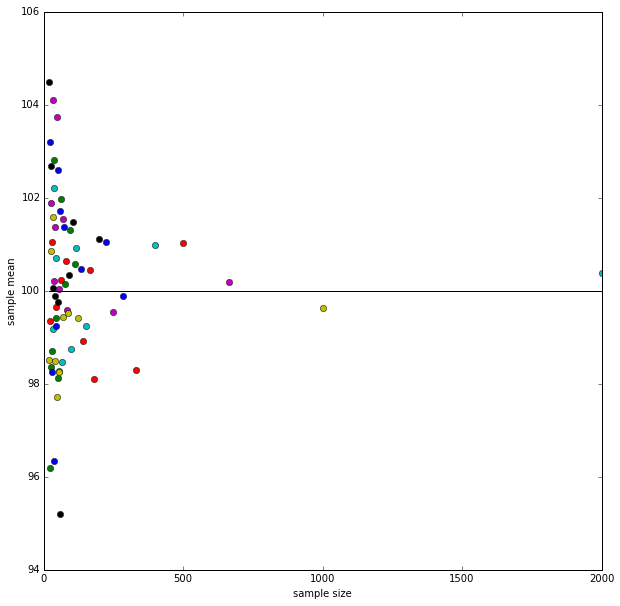

In [120]:
import pylab as pl
%pylab inline
md['chisq']={}
md['pois']={}
md['gaus'] = {}
md['binomial'] = {}
md['laplace'] ={}
md['gamma'] = {}

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size=n)
    md['pois'][n] = np.random.poisson(df, size=n)
    md['gaus'][n] = np.random.normal(df, scale=1.0, size=n)
    md['binomial'][n] = np.random.binomial(2*df,.5,size=n)
    md['gamma'][n] = np.random.gamma(df, scale=1.0, size=n)
    md['laplace'][n] = numpy.random.laplace(df, scale=1.0, size=n)
means = {}
means['chisq'] = {}
means['pois'] ={}
means['gaus'] ={}
means['binomial'] ={}
means['gamma'] ={}
means['laplace'] ={}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in md['chisq'].iterkeys():
    means['chisq'][nn] = md['chisq'][nn].mean()
    #and plot it
    axchisq_mu_n.plot(nn, means['chisq'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysize), max(mysize)],[df,df], 'k')  

Populating the interactive namespace from numpy and matplotlib


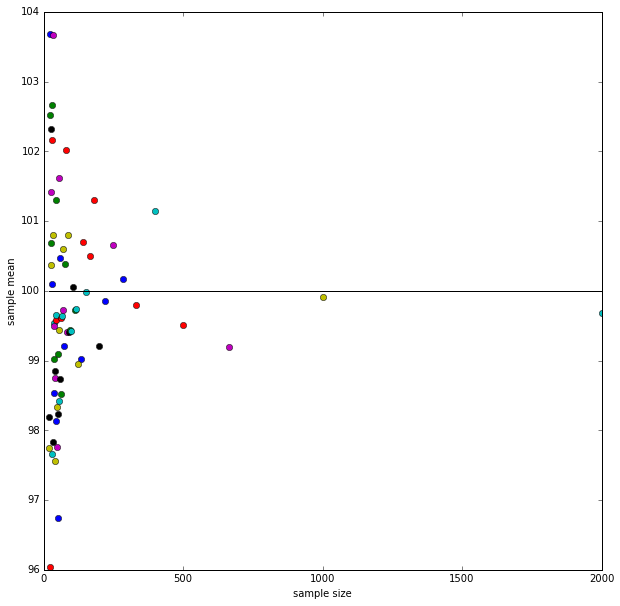

In [121]:
#poisson distribution
%pylab inline
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in md['pois'].iterkeys():
    means['pois'][nn] = md['pois'][nn].mean()
    #and plot it
    axchisq_mu_n.plot(nn, means['pois'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysize), max(mysize)],[df,df], 'k')  

Populating the interactive namespace from numpy and matplotlib


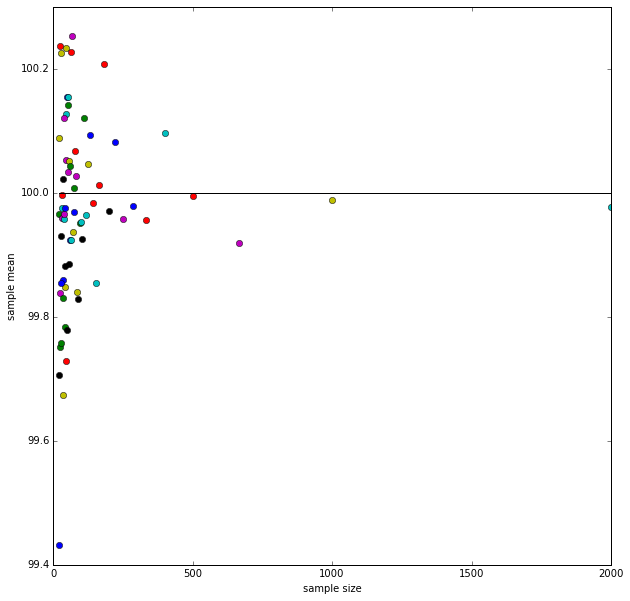

In [122]:
#Gaussian distribution
%pylab inline
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in md['gaus'].iterkeys():
    means['gaus'][nn] = md['gaus'][nn].mean()
    #and plot it
    axchisq_mu_n.plot(nn, means['gaus'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysize), max(mysize)],[df,df], 'k')
    

Populating the interactive namespace from numpy and matplotlib


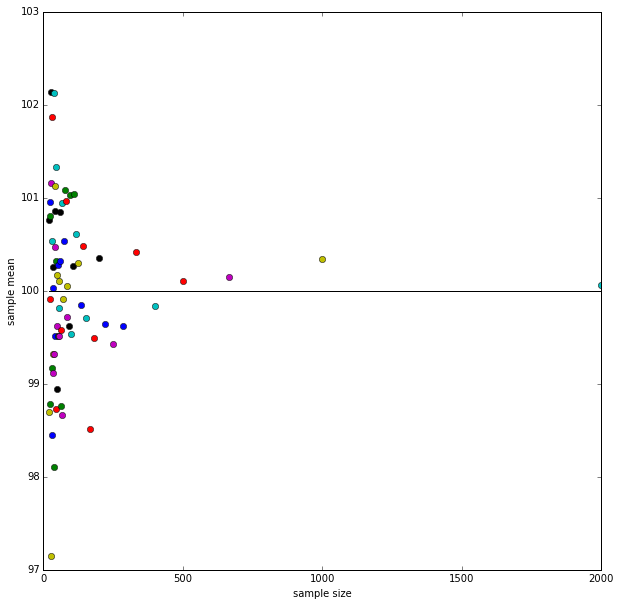

In [123]:
#Binomial distribution
%pylab inline
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in md['binomial'].iterkeys():
    means['binomial'][nn] = md['binomial'][nn].mean()
    #and plot it
    axchisq_mu_n.plot(nn, means['binomial'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysize), max(mysize)],[df,df], 'k')

Populating the interactive namespace from numpy and matplotlib


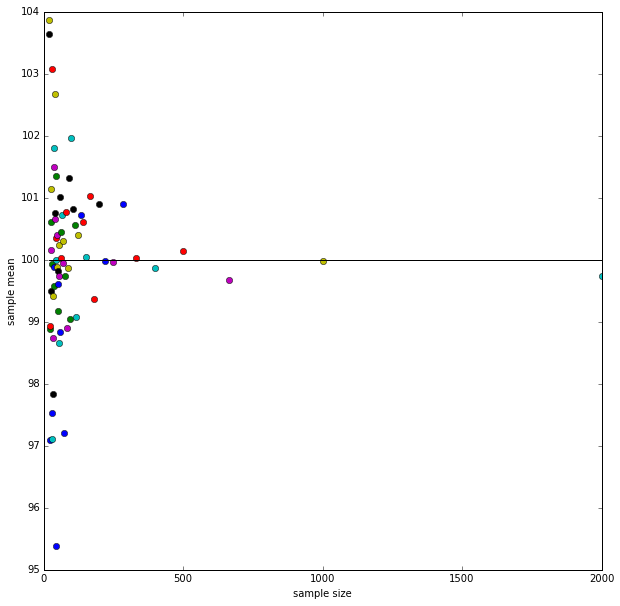

In [124]:
#Gamma distribution
%pylab inline
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in md['gamma'].iterkeys():
    means['gamma'][nn] = md['gamma'][nn].mean()
    #and plot it
    axchisq_mu_n.plot(nn, means['gamma'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysize), max(mysize)],[df,df], 'k')

Populating the interactive namespace from numpy and matplotlib


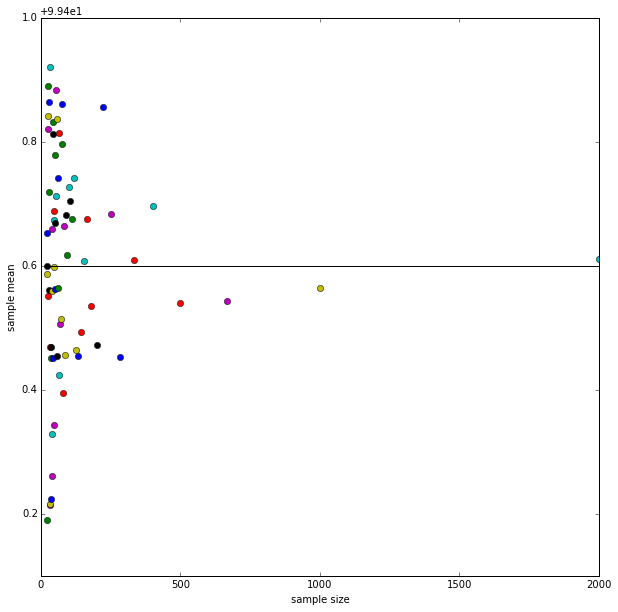

In [134]:
#Laplace distribution
%pylab inline
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in md['laplace'].iterkeys():
    means['laplace'][nn] = md['laplace'][nn].mean()
    #and plot it
    axchisq_mu_n.plot(nn, means['laplace'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysize), max(mysize)],[df,df], 'k')

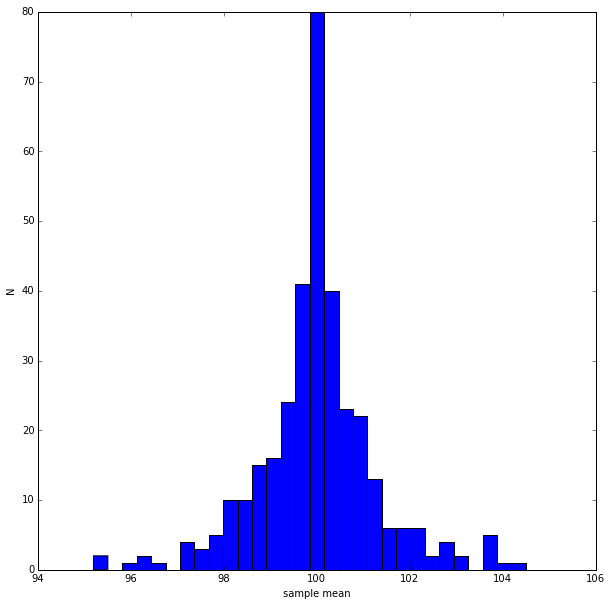

In [127]:
#Overall Histogram
allmeans=[]
for n in means['chisq']:
    allmeans.append(means['chisq'][n])
for n in means['pois']:
    allmeans.append(means['pois'][n])
for n in means['gaus']:
    allmeans.append(means['binomial'][n])
for n in means['gamma']:
    allmeans.append(means['gamma'][n])
for n in means['laplace']:
    allmeans.append(means['laplace'][n])
pl.figure(figsize=(10,10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean')
pl.ylabel('N')

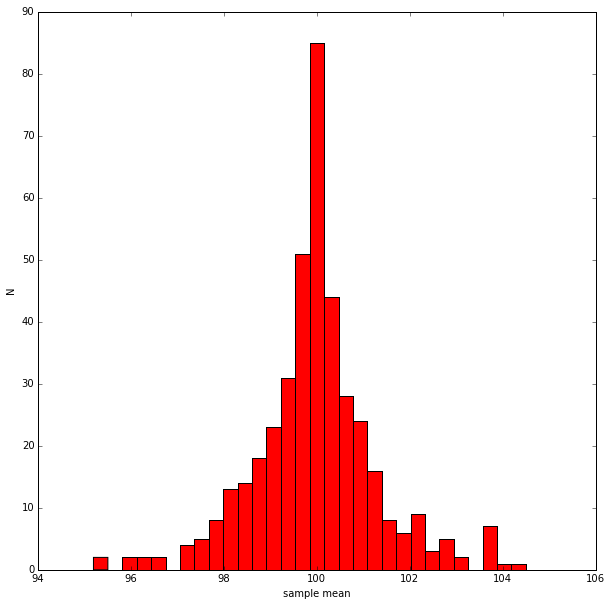

In [128]:
#poission histogram
for n in means['pois']:
    allmeans.append(means['pois'][n])
pl.figure(figsize=(10,10))
pl.hist(allmeans,bins=30,color='red')
pl.xlabel('sample mean')
pl.ylabel('N')

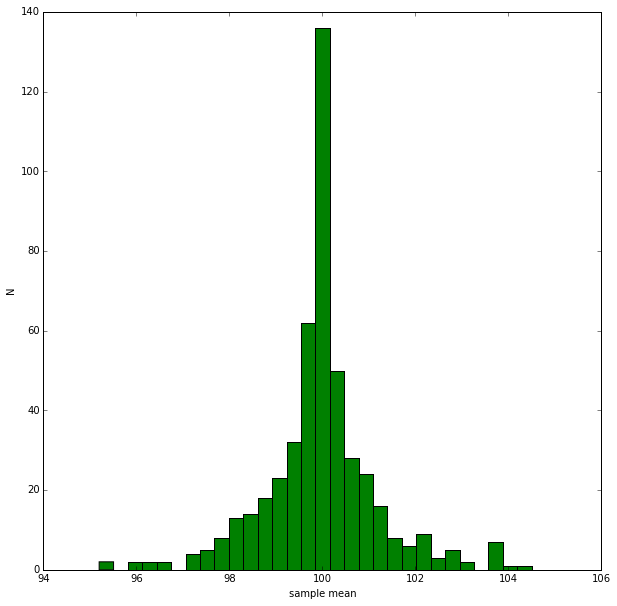

In [129]:
#Gaussian Histogram
for n in means['gaus']:
    allmeans.append(means['gaus'][n])
pl.figure(figsize=(10,10))
pl.hist(allmeans,bins=30,color='green')
pl.xlabel('sample mean')
pl.ylabel('N')

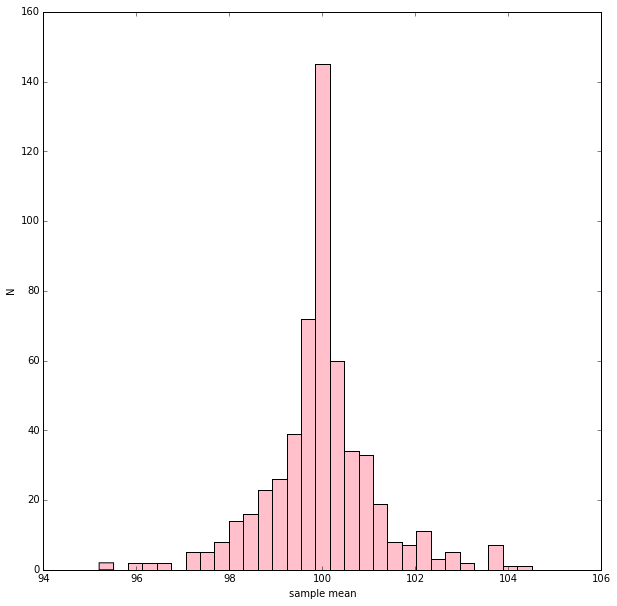

In [130]:
#Binomial Histogram
for n in means['binomial']:
    allmeans.append(means['binomial'][n])
pl.figure(figsize=(10,10))
pl.hist(allmeans,bins=30,color='pink')
pl.xlabel('sample mean')
pl.ylabel('N')

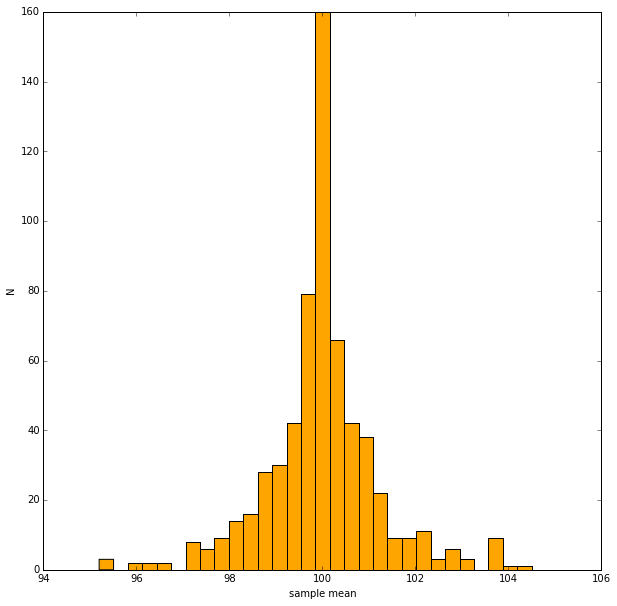

In [131]:
#Gamma Histogram
for n in means['gamma']:
    allmeans.append(means['gamma'][n])
pl.figure(figsize=(10,10))
pl.hist(allmeans,bins=30,color='orange')
pl.xlabel('sample mean')
pl.ylabel('N')

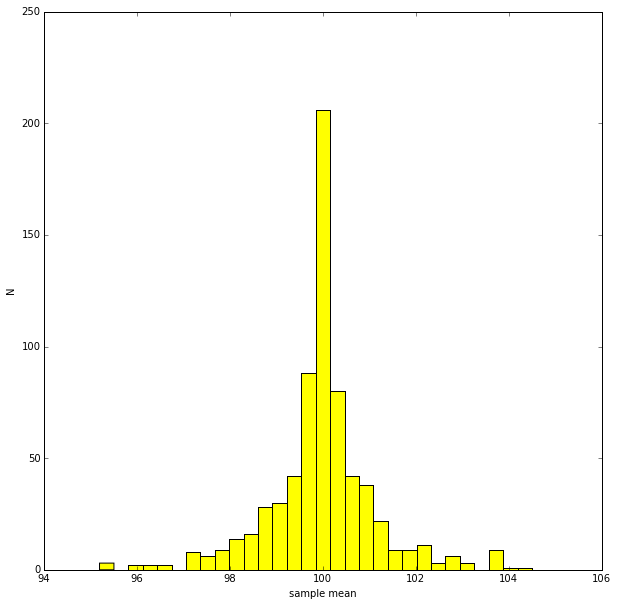

In [133]:
#Laplace Histogram
for n in means['laplace']:
    allmeans.append(means['laplace'][n])
pl.figure(figsize=(10,10))
pl.hist(allmeans,bins=30,color='yellow')
pl.xlabel('sample mean')
pl.ylabel('N')